In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression  
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [3]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
# Check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Unique values in categorical columns
print(df['v1'].unique())
print(df['v2'].unique())
print(df['Unnamed: 2'].unique())
print(df['Unnamed: 3'].unique())
print(df['Unnamed: 4'].unique())

['ham' 'spam']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
[nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t mis

In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows: {dup}')

Number of duplicated rows: 403


In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [8]:
# Encode the categories
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
# Rename columns
df.rename(columns={'v1': 'Category_name', 'v2': 'Message'}, inplace=True)

In [12]:
# Count of categories
print(df["Category_name"].value_counts())

Category_name
ham     4516
spam     653
Name: count, dtype: int64


In [13]:
# Initialize the stemmer
nltk.download('stopwords')
stw = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Define a function for text processing
def text_preprocessing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [stw.stem(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

In [15]:
# Apply the function to the message column
df['Message'] = df['Message'].apply(text_preprocessing)

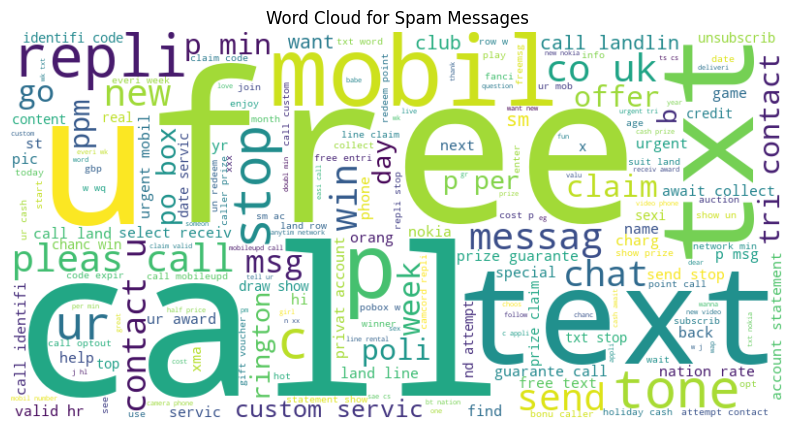

In [16]:
# Create word clouds for spam and ham messages
spam_df = df[df['Category'] == 0]
spam_text = ' '.join(spam_df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

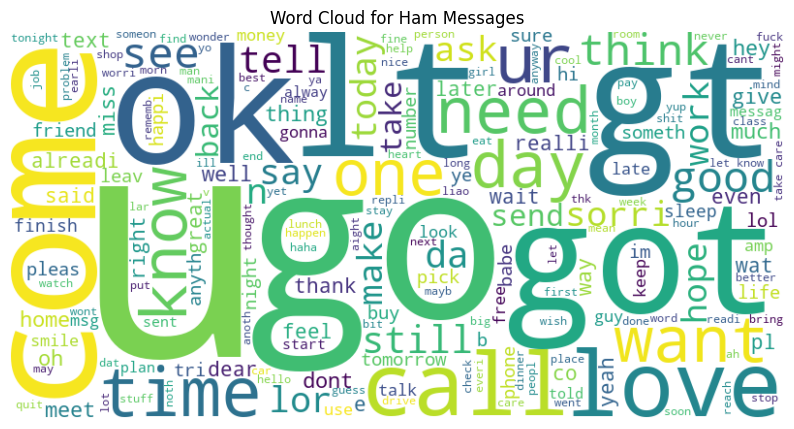

In [17]:
ham_df = df[df['Category'] == 1]
ham_text = ' '.join(ham_df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

In [18]:
# Train-test split
X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
# Feature Extraction - TF-IDF
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [20]:
# Convert labels to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [21]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [22]:
# Model evaluation
prediction_on_training_data_lr = model.predict(X_train_features)
accuracy_on_training_data_lr = accuracy_score(y_train, prediction_on_training_data_lr)

prediction_on_test_data_lr = model.predict(X_test_features)
accuracy_on_test_data_lr = accuracy_score(y_test, prediction_on_test_data_lr)

In [23]:
# Print accuracy
print('Accuracy on training data (Logistic Regression): {:.2f} %'.format(accuracy_on_training_data_lr * 100))
print('Accuracy on test data (Logistic Regression): {:.2f} %'.format(accuracy_on_test_data_lr * 100))

Accuracy on training data (Logistic Regression): 96.69 %
Accuracy on test data (Logistic Regression): 96.42 %


In [25]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_features, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [26]:
# Model evaluation
prediction_on_training_data_rfc = rfc.predict(X_train_features)
accuracy_on_training_data_rfc = accuracy_score(y_train, prediction_on_training_data_rfc)

In [28]:
# Make predictions on test data
prediction_on_test_data_rfc = rfc.predict(X_test_features)  # Ensure this line is present
accuracy_on_test_data_rfc = accuracy_score(y_test, prediction_on_test_data_rfc)

In [29]:
# Print accuracy
print('Accuracy on training data_rfc: {} %'.format(accuracy_on_training_data_rfc * 100))
print('Accuracy on test data_rfc: {} %'.format(accuracy_on_test_data_rfc * 100))

Accuracy on training data_rfc: 100.0 %
Accuracy on test data_rfc: 97.48549323017409 %


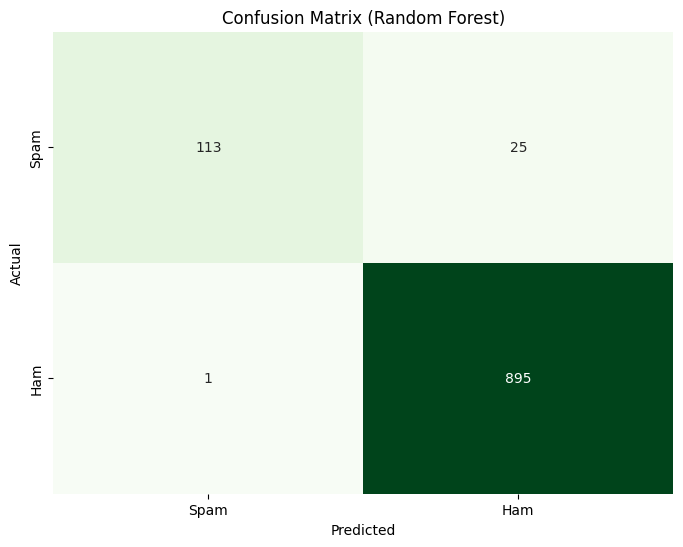

In [30]:
# Confusion Matrix Visualization for Random Forest
conf_matrix_rfc = confusion_matrix(y_test, prediction_on_test_data_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [31]:
# XGBoost Classifier Model
xgb = XGBClassifier(n_estimators=50, random_state=2)
xgb.fit(X_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [32]:
# Model evaluation
prediction_on_training_data_xgb = xgb.predict(X_train_features)
accuracy_on_training_data_xgb = accuracy_score(y_train, prediction_on_training_data_xgb)

prediction_on_test_data_xgb = xgb.predict(X_test_features)
accuracy_on_test_data_xgb = accuracy_score(y_test, prediction_on_test_data_xgb)

In [33]:
# Print accuracy
print('Accuracy on training data (XGBoost): {:.2f} %'.format(accuracy_on_training_data_xgb * 100))
print('Accuracy on test data (XGBoost): {:.2f} %'.format(accuracy_on_test_data_xgb * 100))

Accuracy on training data (XGBoost): 98.72 %
Accuracy on test data (XGBoost): 97.10 %


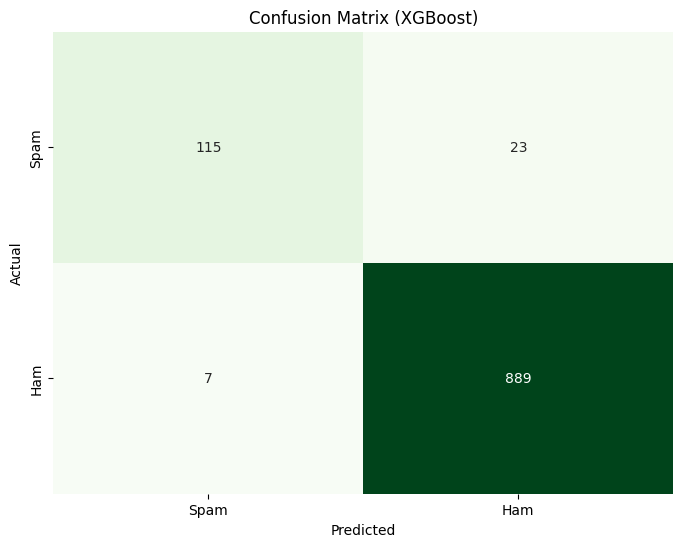

In [34]:
# Confusion Matrix Visualization for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, prediction_on_test_data_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

In [35]:
#email prediction
input_your_mail = "Dear Apoorva, I hope you're doing good."
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [36]:
input_your_mail = "Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
